# Hello Welcome to Youtube Video Transcript Summarizer

## This Notebook uses python based Machine Learning libraries to perform two main tasks
<B>1. Extract Transcript text from the given YouTube Video
    
<B>2. Summarizing the extracted Text (Transcript) 


# Project Context

<H> Enormous number of videos are being recorded and uploaded on Internet everyday. Watching videos with longer duration really become a difficult task and our efforts become futile if we couldn,t find relevant information out of it.

<H> Summarizing the transcript gives us the summary of the video and allow us instead of going through complete video look up for the important extract of the video that helps us to save time
<h> This project gives us the experience of NLP techinique of abstractive text summarization



# You Tube Transcript Api

This is a python API which allows you to get the transcript/subtitles for a given YouTube video.

In [1]:
!pip install -q transformers

## This is a python API which allows you to get the transcript/subtitles for a given YouTube video

In [2]:
!pip install -q youtube_transcript_api

# 1. Importing pipeline from transformers

# 2. Importing YoutubeTranscript Api

In [3]:
from transformers import pipeline

from youtube_transcript_api import YouTubeTranscriptApi as yt


In [4]:
import warnings
warnings.filterwarnings('ignore')

# 3. Importing tkinter

### The tkinter package is the standard Python interface to the GUI toolkit


##### Pop up box to take input of youtube video to be summarized
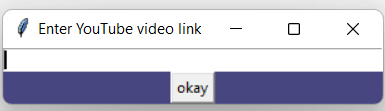

In [11]:
from tkinter import *
def printtext():
    global e
    printtext.string = e.get() 
     

root = Tk()


root.config(bg='#474680')
root.title('Enter YouTube video link')

e = Entry(root,width =50)
e.pack()
e.focus_set()

b = Button(root,text='okay',command=printtext)
b.pack(side='bottom')
root.mainloop()

# 4. Store the Input value 

In [12]:
video = printtext.string

# 5. Extracting the video id from the link

### Example:-
    Link = www.youtube.com/watch?v=YKRdeY3SACg
      video id = YKRdeY3SACg

In [13]:
vid_id = video.split("=")[1]

In [14]:
vid_id

'P8wCk8FU7_o'

# 6. Displaying the youtube video 


 Using Ipython.display 
 we can display the video we want to summarize 
 
 

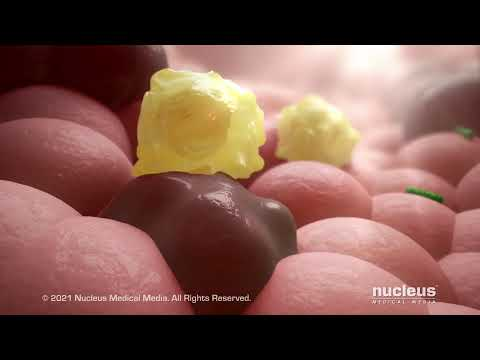

In [15]:
from IPython.display import YouTubeVideo
YouTubeVideo(vid_id)

# 7. Getting the video transcript 

   ### We will get the transcript from you_tube_transcript_api in form of json object

     The transcript will not be extracted in form of text file from youtube_transcript_api it will be the json object
     example:-

     {

       'duration': 5 
       'start': 0.20 
       'text': 'hy ....................................................................'
      }

In [16]:

data=yt.get_transcript(vid_id)

In [17]:
data[0:5];

# 8. Extracting  from the Json Object
  
  ### The idea simple is to iterate through the json object and every time encounters with text add the text to the result string
  
 
  
#### print the size of text transcript

In [18]:
transcript=''
for value in data:
    for key,val in value.items():
         if key == 'text':
              transcript+=val

I= transcript.splitlines()
final_tra=" ".join(I)
print(final_tra)

this animation is brought to you by thesmart image basea subscription website where you candownload thousands of medicalimages and videos to use in lecturescoursespresentations professional training andmore for more informationclick on the link in the descriptionimmunization is the process of becomingimmune toor protected against a disease usuallyby receiving a vaccinevaccines stimulate your immune system toprotect you from certain diseasesso you won't get sick or get aninfectionnormally the organs and cells of yourimmune system defend your body fromharmful germssuch as bacteria and virusesimmune cells are constantly circulatingthrough your bodythey monitor certain substances on thesurfaces of cellscalled antigens healthy cells havedifferent antigens than diseased bodycellsor foreign invaders in the bodyimmune cells usually ignore the antigenson healthy cellsbut when immune cells come acrossantigens ongerms they destroy the germafterward the immune cell displays thegerms antigen on its

#### Transcript extraction finished 
   We get the transcript in our result string<hr>

In [19]:
len(final_tra)


5321

# 9. Creating a pipeline for summarization


    By default it uses Bart model with Pytorch and GPT model

In [20]:
summarizer = pipeline('summarization');

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)


# 10. Using Bart Summarizer

 ### Bart doesnot support long chunks of text to summarize
     So we take a minimum value and check iterate a particular amount of text at particular time
     
     For Example :- If total word count of result are  12000
     then we take x as 12000/1000
     so we will take 1000 words at a time and summarize the complete text 12 times
     
     
     
     Take Out and take field summary text in it
     and finally twelve times you append the summary to summarized_text[] which is a list
     

In [29]:
x = int(len(final_tra)/1500)
summarized_text = []
for i in range(0, x + 1):
  start = 0
  start = i * 1500
  end = (i + 1) * 1500 
  out = summarizer(final_tra[start:end])
  out = out[0]
  out = out['summary_text']
  summarized_text.append(out)


# 11. Checking the length of the summarized Text

In [30]:
len(str(summarized_text))

1420

# 12. Printing the Summarized Text

In [31]:
str(summarized_text);

In [32]:

file1 = open("file.txt","r+")
file1.truncate(0)

  
file1.writelines(summarized_text)
  
# Closing file
file1.close()
  
# Checking if the data is
# written to file or not
file1 = open('file.txt', 'r')
print(file1.read())
file1.close()

 Immunization is the process of becoming immune to or protected against a disease usually by receiving a vaccine . Vaccines stimulate your immune system toprotect you from certain diseasesso you won't get sick or get aninfection . When immune cells come acrossantigens ongerms they destroy the germafterward the immune cell displays thegerms antigen on its surfacethis activates other immunecells to help get rid of the infection . Some naturally acquiredinfections can cause serious complications or may even be deadly for examplepolio can result in permanent paralysis or permanent brain damage . Vaccines often contain a small amount ofweakened or killed germs but some contain genetic material such asrna or dna that provide instructions for your body's own cells to make the germsantigen . The main types of vaccines include liveattenuated vaccines inactivated vaccines inactivate vaccines subunit and conjugate vaccines . Vaccines contain a special type of rnacalledmessenger rna or mrnamrna in